In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import time, timedelta
from matplotlib.ticker import FuncFormatter, LinearLocator

SECONDS_IN_A_DAY = 60 * 60 * 24
get_time = lambda x: time(hour=(hours := x // 3600), minute=(x - (hours * 3600)) // 60, second=x % 60)


plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": "\\usepackage[OT4]{polski} \\usepackage[T1]{fontenc} \\usepackage{tgtermes}",
})

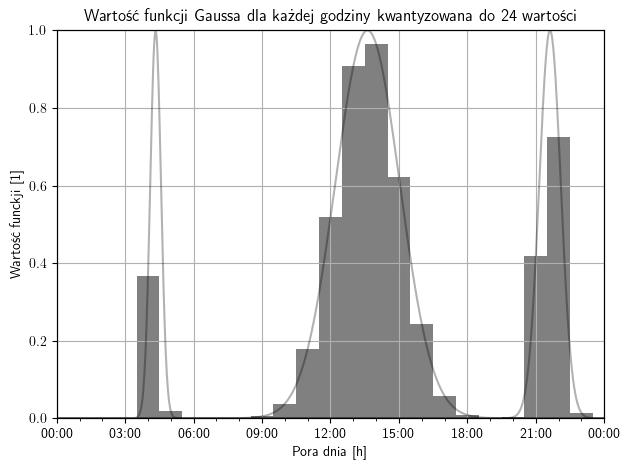

In [7]:
time_space = np.linspace(0, 1, 24, False)
bell_space = np.linspace(0, 1, 1000, False)

@FuncFormatter
def get_time_format(x, pos):
    return get_time(math.floor((x * SECONDS_IN_A_DAY) % SECONDS_IN_A_DAY)).strftime("%H:%M")

fig, ax1 = plt.subplots()
ax1.set_xlim(0, 1)
ax2 = ax1.twiny()
ax2.set_xlim(0, 1000)
ax2.set_xticks([])

ax1.set_xticks(np.linspace(0, 1, 9))
ax1.xaxis.set_major_formatter(get_time_format)
ax1.xaxis.set_minor_locator(LinearLocator(25))
ax1.set_ylim(0, 1)

ax1.grid()

x_time_1 = time(21, 37, 21)
x_time_2 = time(13, 37, 21)
x_time_3 = time(4, 20, 2)

seconds_1 = timedelta(hours=x_time_1.hour, minutes=x_time_1.minute, seconds=x_time_1.second).total_seconds() / SECONDS_IN_A_DAY
seconds_2 = timedelta(hours=x_time_2.hour, minutes=x_time_2.minute, seconds=x_time_2.second).total_seconds() / SECONDS_IN_A_DAY
seconds_3 = timedelta(hours=x_time_3.hour, minutes=x_time_3.minute, seconds=x_time_3.second).total_seconds() / SECONDS_IN_A_DAY

ax1.bar(time_space, np.exp(-np.abs((seconds_1 - time_space) * 36) ** 2), width=1/24, color="grey")
ax2.plot(np.exp(-np.abs((seconds_1 - bell_space) * 36) ** 2), color="black", alpha=0.3)

ax1.bar(time_space, np.exp(-np.abs((seconds_2 - time_space) * 12) ** 2), width=1/24, color="grey")
ax2.plot(np.exp(-np.abs((seconds_2 - bell_space) * 12) ** 2), color="black", alpha=0.3)

ax1.bar(time_space, np.exp(-np.abs((seconds_3 - time_space) * 72) ** 2), width=1/24, color="grey")
ax2.plot(np.exp(-np.abs((seconds_3 - bell_space) * 72) ** 2), color="black", alpha=0.3)
# ax1.vlines([seconds], [0], [1], colors=["black"], alpha=0.3)

ax1.set_xlabel("Pora dnia [h]")
ax1.set_ylabel("Wartość funckji [1]")
ax1.set_title("Wartość funkcji Gaussa dla każdej godziny kwantyzowana do 24 wartości")

plt.tight_layout()
plt.savefig("../thesis/img/time_param.pdf", bbox_inches="tight")